#https://scikit-learn.org/stable/datasets/toy_dataset.html

In [ ]:
#Biblioteki
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [ ]:
#Wczytanie dnaych
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
# Podział na zbiór testowty i treningowy
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-0

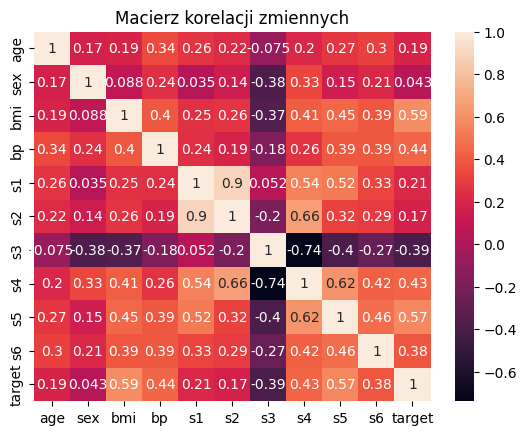

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


In [ ]:
#Podstawowa analiza danych
df= pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = diabetes.target

print(df.head(5))
print(df.describe())
print()
print(df.info())
print()

print(df.isnull().sum())
print(df.duplicated().sum())
#Nie ma brakujących wartości i duplikatów

# Macierz korelacji
corr_matrix = df.corr()
# Wizualizacja korelacji
print()
sns.heatmap(corr_matrix, annot=True)
plt.title("Macierz korelacji zmiennych")
plt.show()

#Typy zmiennych
print(df.dtypes)

Dane są już zestandaryzowane

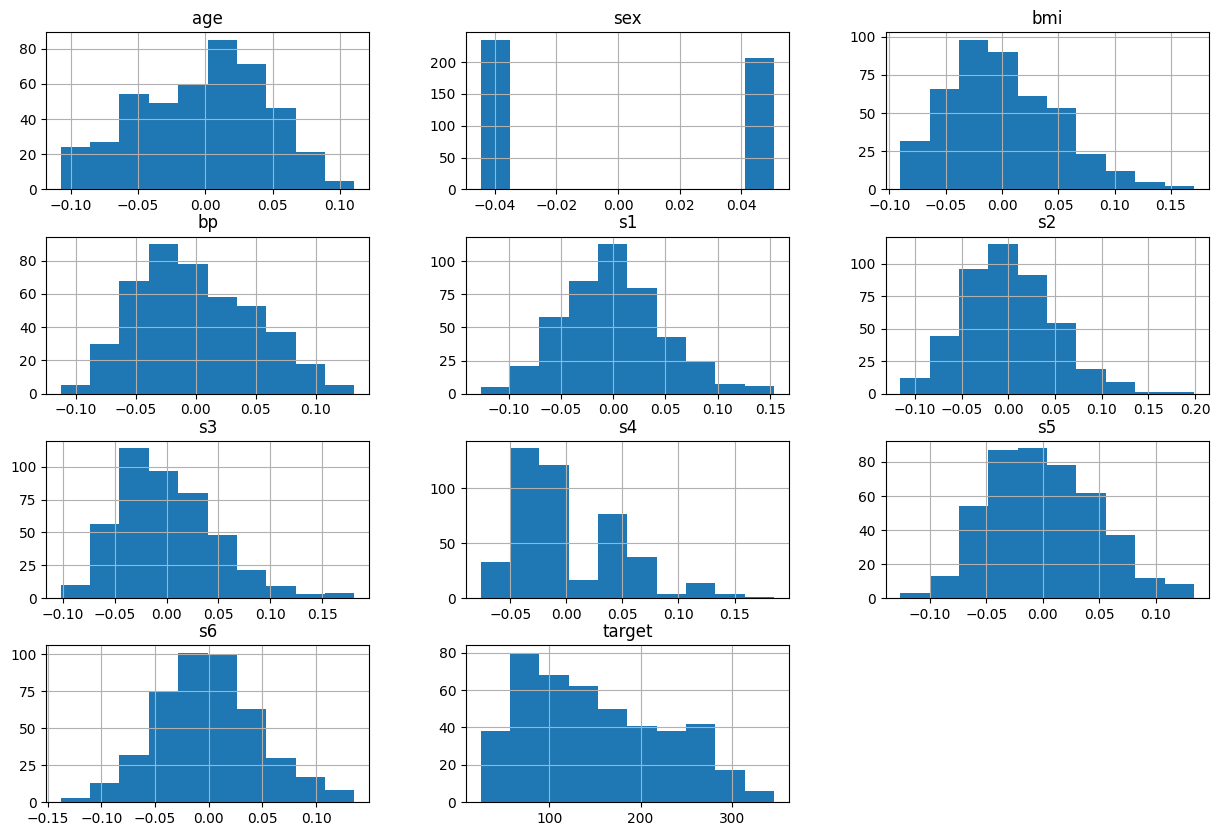

In [ ]:
#Wykresy
#histogramy
df.hist(figsize=(15, 10))
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import shapiro, normaltest, anderson

# Załóżmy, że masz DataFrame o nazwie df

for column in df.columns:
    print(f"Cecha: {column}")

    # Shapiro-Wilk
    stat_sw, p_sw = shapiro(df[column])
    print(f"  Shapiro-Wilk: stat={stat_sw:.4f}, p={p_sw:.4f} --> {'normalny' if p_sw > 0.05 else 'nienormalny'}")

    # D'Agostino and Pearson
    try:
        stat_dp, p_dp = normaltest(df[column])
        print(f"  D’Agostino-Pearson: stat={stat_dp:.4f}, p={p_dp:.4f} --> {'normalny' if p_dp > 0.05 else 'nienormalny'}")
    except Exception as e:
        print("  D’Agostino-Pearson: Błąd (możliwe, że za mało danych)")

    # Anderson-Darling
    result_ad = anderson(df[column], dist='norm')
    ad_stat = result_ad.statistic
    # Krytyczna wartość dla poziomu 5%
    ad_crit_val = result_ad.critical_values[2]  # poziom 5%
    print(f"  Anderson-Darling: stat={ad_stat:.4f}, crit(5%)={ad_crit_val:.4f} --> {'normalny' if ad_stat < ad_crit_val else 'nienormalny'}")

    print("-" * 50)


Cecha: age
  Shapiro-Wilk: stat=0.9824, p=0.0000 --> nienormalny
  D’Agostino-Pearson: stat=22.9807, p=0.0000 --> nienormalny
  Anderson-Darling: stat=2.1691, crit(5%)=0.7800 --> nienormalny
--------------------------------------------------
Cecha: sex
  Shapiro-Wilk: stat=0.6351, p=0.0000 --> nienormalny
  D’Agostino-Pearson: stat=1895.7403, p=0.0000 --> nienormalny
  Anderson-Darling: stat=79.6623, crit(5%)=0.7800 --> nienormalny
--------------------------------------------------
Cecha: bmi
  Shapiro-Wilk: stat=0.9728, p=0.0000 --> nienormalny
  D’Agostino-Pearson: stat=23.6656, p=0.0000 --> nienormalny
  Anderson-Darling: stat=3.0407, crit(5%)=0.7800 --> nienormalny
--------------------------------------------------
Cecha: bp
  Shapiro-Wilk: stat=0.9837, p=0.0001 --> nienormalny
  D’Agostino-Pearson: stat=15.6214, p=0.0004 --> nienormalny
  Anderson-Darling: stat=2.6095, crit(5%)=0.7800 --> nienormalny
--------------------------------------------------
Cecha: s1
  Shapiro-Wilk: stat

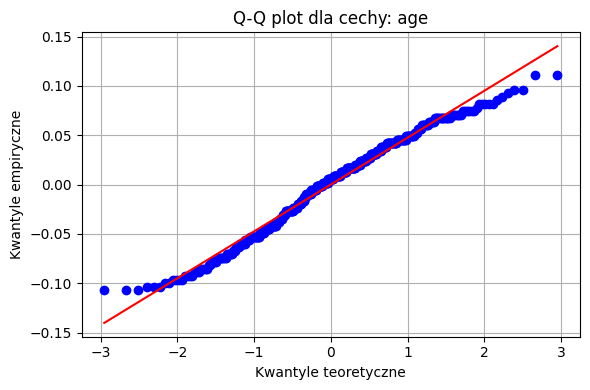

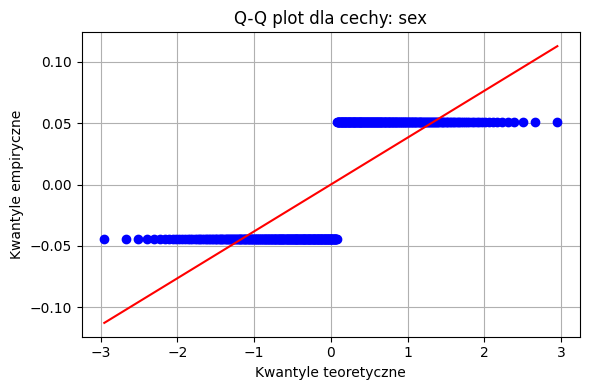

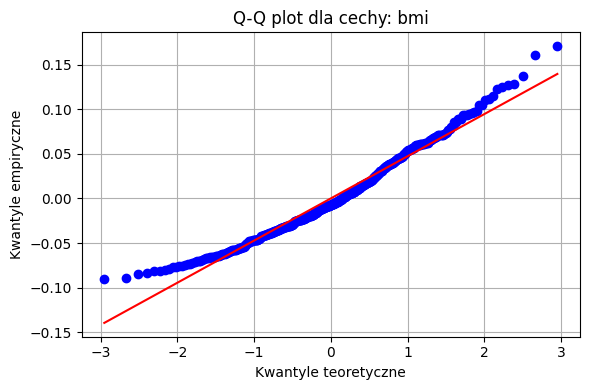

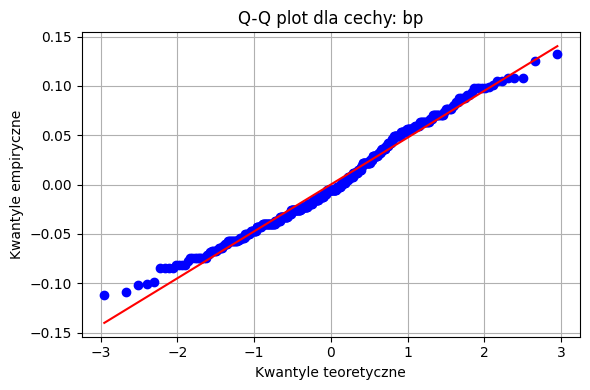

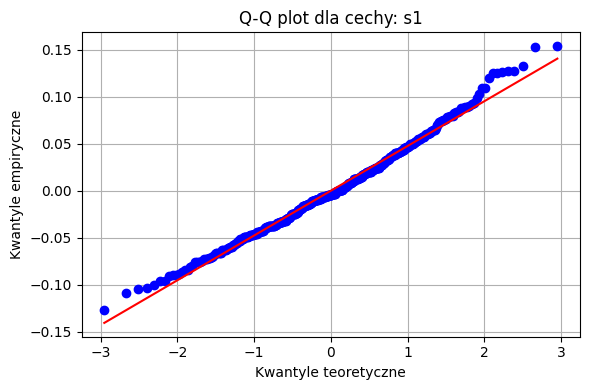

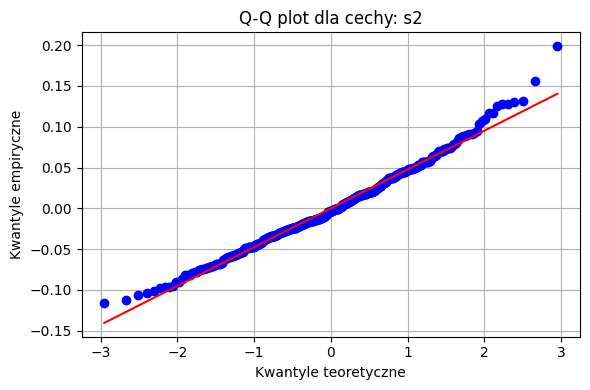

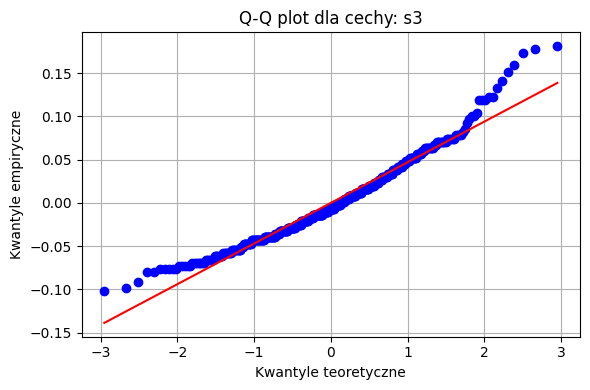

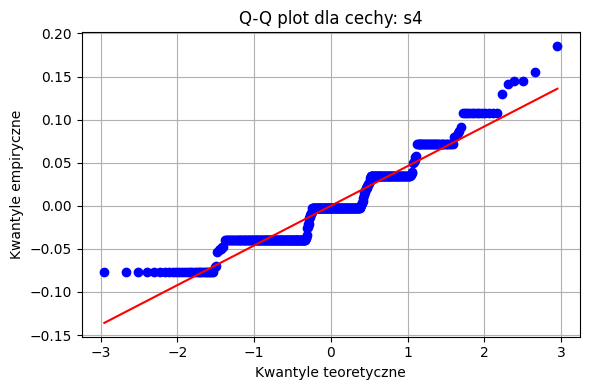

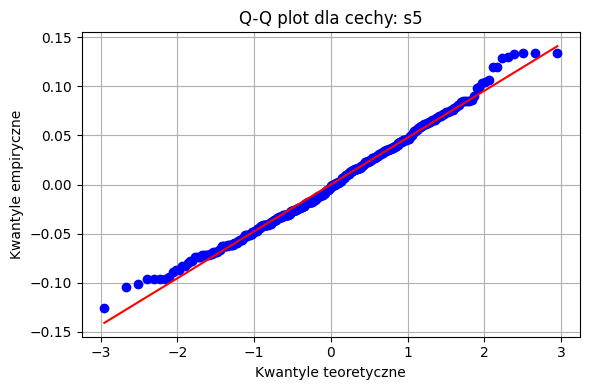

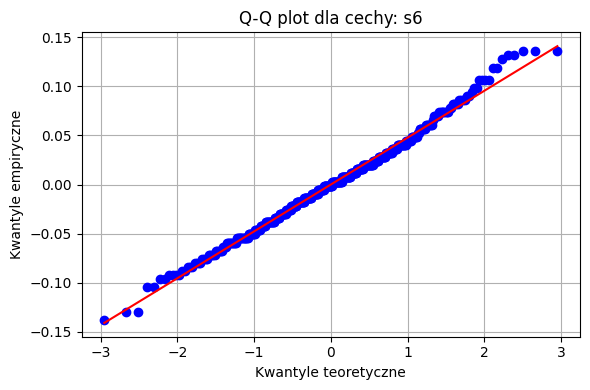

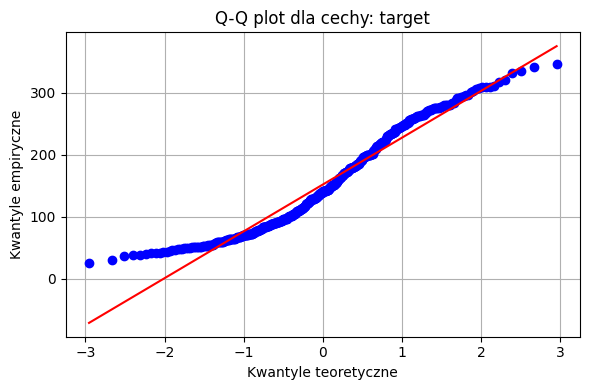

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Zakładamy, że masz już DataFrame `df`
for column in df.columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f"Q-Q plot dla cechy: {column}")
    plt.xlabel("Kwantyle teoretyczne")
    plt.ylabel("Kwantyle empiryczne")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

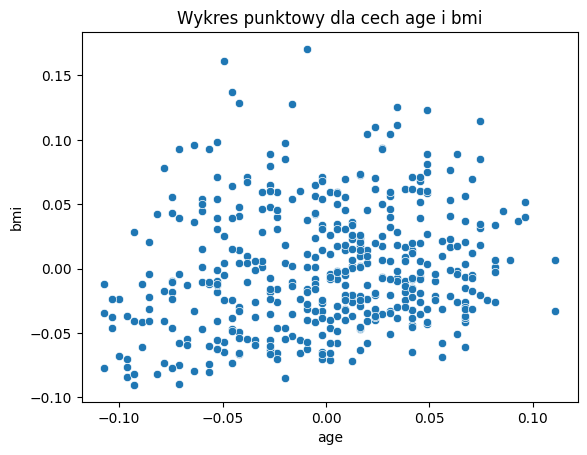

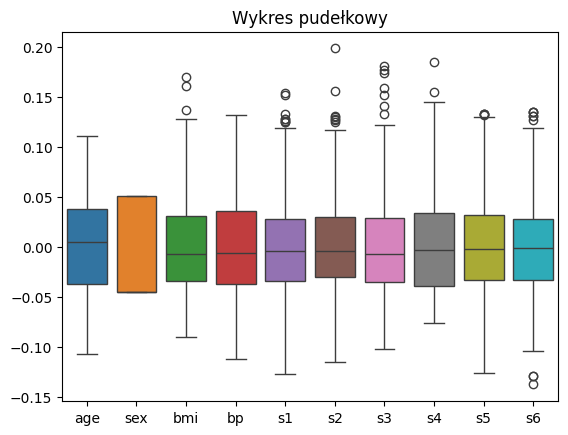

In [ ]:
# Wykres punktowy dla cech 'age' i 'bmi'
sns.scatterplot(x='age', y='bmi', data=df)
plt.title('Wykres punktowy dla cech age i bmi')
plt.show()

# Wykres pudełkowy
sns.boxplot(data=df[diabetes.feature_names])
plt.title('Wykres pudełkowy')
plt.show()

Wioskie z analizy danych:
- Dane w zbiorze są zestandaryzowane
---
- Brak duplikatów i brakujących danych
---
- Rozkład cech: Cechy nie mają rozkładku normalnego oprocz cechy s6.
---
- Wartośći odstające:
  1. **Większość zmiennych** ma rozkład zbliżony do symetrycznego wokół zera – to potwierdza, że dane są **znormalizowane**.
  2. Występują **odstające obserwacje** w takich cechach jak:
   - `bmi`, `s1`, `s2`, `s4`, `s5`, `s6` – mają sporo punktów poza granicami pudełka.
  4. **Brak silnych asymetrii** – niektóre zmienne mają nieco przesuniętą medianę, ale ogólnie dane są dobrze rozłożone.

  ### Wnioski:
  1. Rozkład zmiennych wygląda dobrze – normalizacja działa dobrze.
  2. Można rozważyć usunięcie lub analizę wartości odstających w niektórych zmiennych, np. `s2`, `s5`.
---
- Zależności:
#### **Najmocniejsze zależności:**
  1. `s1` i `s2`: korelacja **0.90** – bardzo silna współzależność, mogą zawierać podobną informację (można rozważyć redukcję wymiaru).
  2. `s3` i `s4`: korelacja **-0.74** – silna **ujemna** korelacja.
  3. `s4` i `s5`: korelacja **0.62**
  4. `bmi` i `target`: korelacja **0.59** – BMI ma stosunkowo silny wpływ na wartość zmiennej docelowej, warto go uwzględnić w modelu predykcyjnym.

#### **Zmienne o niskiej korelacji z targetem**:
  1. `sex`: **0.04**
  2. `s2`: **0.38**
  3. `age`: **0.19**

###**Wnioski praktyczne:**
  1. **Do modelu predykcyjnego** warto rozważyć `bmi`, `bp`, `s5`, `s6`, `s4`, bo mają wyraźne korelacje z celem (`target`).
  2. **Zmienne silnie skorelowane między sobą** (`s1` i `s2`, `s3` i `s4`) mogą prowadzić do wielokolinearności – warto użyć PCA, regularizacji (np. Lasso), lub wybrać tylko jedną z nich.
  3. **Zmienne słabo skorelowane z celem** (np. `sex`, `age`) mogą być mniej istotne, ale nadal mogą poprawiać model w interakcji z innymi.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Funkcja do oceny modelu regresyjnego.

    Zwraca słownik z metrykami dla zbioru treningowego i testowego.
    """
    # Predykcja
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Obliczanie metryk dla zbioru treningowego
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Obliczanie metryk dla zbioru testowego
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Zwracanie wyników
    return {
        "MSE_train": mse_train,
        "RMSE_train": rmse_train,
        "MAE_train": mae_train,
        "R2_train": r2_train,
        "MSE_test": mse_test,
        "RMSE_test": rmse_test,
        "MAE_test": mae_test,
        "R2_test": r2_test,
        "y_test_pred": y_test_pred
    }


In [ ]:
import matplotlib.pyplot as plt

def plot_results(results, y_test, models):
    """
    Funkcja do rysowania wykresów porównujących wyniki modelu.
    """
    # Wykres słupkowy MSE
    labels = list(results.keys())
    mse_values = [results[m]["MSE_test"] for m in labels]

    plt.figure(figsize=(8, 5))
    plt.bar(labels, mse_values, color=['blue', 'green', 'orange'])
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title("Porównanie modeli regresyjnych - MSE")
    plt.show()

    # Wykresy: y_true vs y_pred
    for name in models.keys():
        plt.figure(figsize=(6, 4))
        plt.scatter(y_test, results[name]["y_test_pred"], alpha=0.6, color="steelblue")
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel("Rzeczywista wartość")
        plt.ylabel("Przewidywana wartość")
        plt.title(f"{name} - y_test vs y_pred")
        plt.tight_layout()
        plt.grid(True, linestyle="--", alpha=0.4)
        plt.show()

    # Histogram błędów predykcji
    for name in models.keys():
        errors = y_test - results[name]["y_test_pred"]
        plt.figure(figsize=(6, 4))
        plt.hist(errors, bins=25, color='turquoise', edgecolor='black')
        plt.title(f"{name} - Histogram błędów predykcji")
        plt.xlabel("Błąd predykcji")
        plt.ylabel("Liczba próbek")
        plt.tight_layout()
        plt.grid(True, linestyle="--", alpha=0.4)
        plt.show()



Regresja Liniowa
Train: MSE=2924.05, RMSE=54.07, MAE=44.10, R²=0.52
Test:  MSE=2821.75, RMSE=53.12, MAE=41.92, R²=0.48

Random Forest
Train: MSE=570.60, RMSE=23.89, MAE=19.56, R²=0.91
Test:  MSE=2862.54, RMSE=53.50, MAE=42.68, R²=0.47

Gradient Boosting
Train: MSE=876.78, RMSE=29.61, MAE=23.61, R²=0.86
Test:  MSE=3071.45, RMSE=55.42, MAE=44.73, R²=0.43


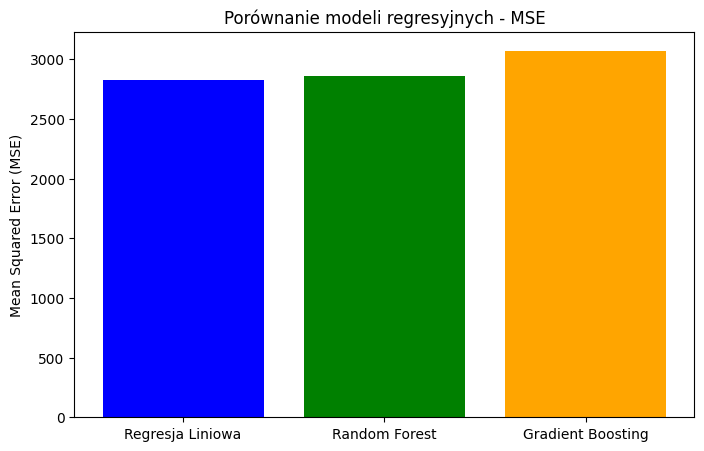

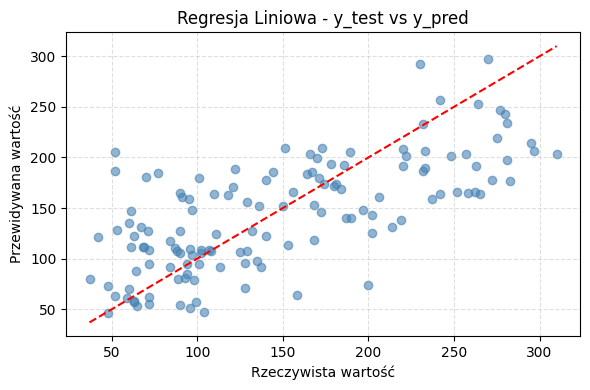

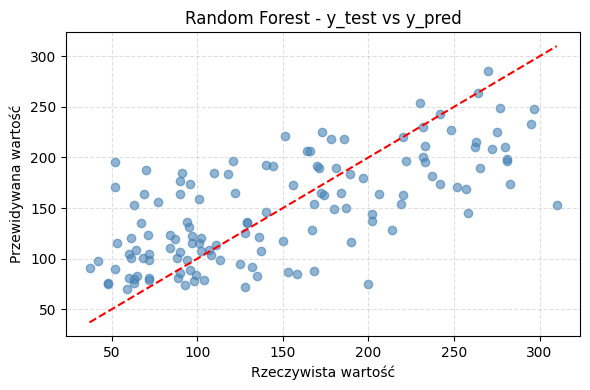

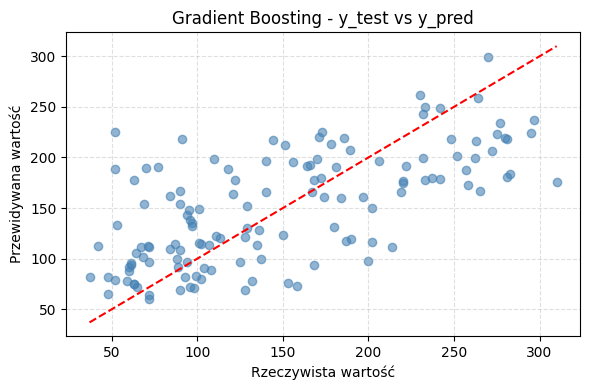

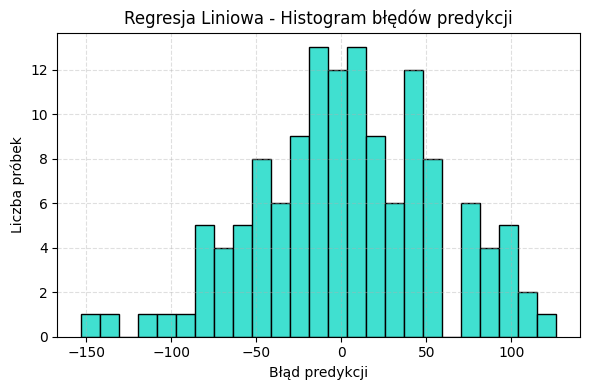

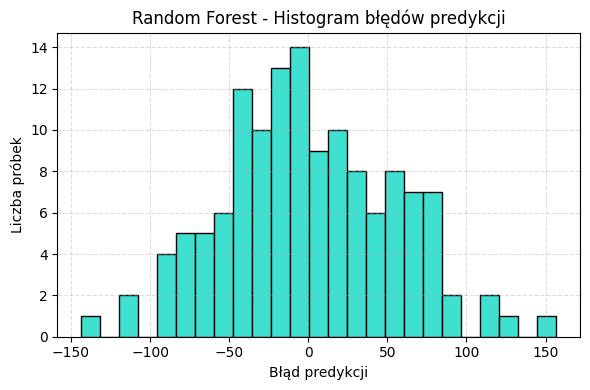

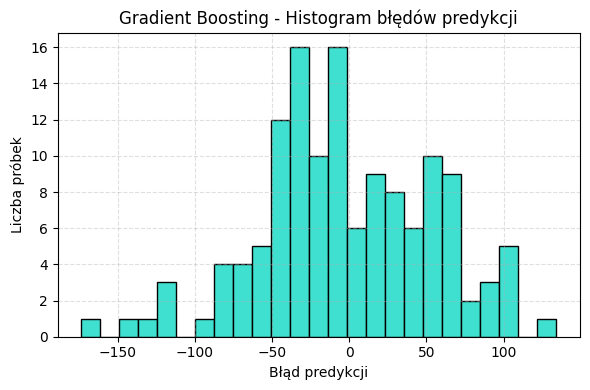

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

models = {
    "Regresja Liniowa": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3),
}

results = {}


# Trening i ocena każdego modelu
for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_train, y_train, X_test, y_test)

    print(f"\n{name}")
    print(f"Train: MSE={results[name]['MSE_train']:.2f}, RMSE={results[name]['RMSE_train']:.2f}, MAE={results[name]['MAE_train']:.2f}, R²={results[name]['R2_train']:.2f}")
    print(f"Test:  MSE={results[name]['MSE_test']:.2f}, RMSE={results[name]['RMSE_test']:.2f}, MAE={results[name]['MAE_test']:.2f}, R²={results[name]['R2_test']:.2f}")

# Rysowanie wykresów
plot_results(results, y_test, models)

MAE- średni błąd bezwzględny mierzy średnią wartość bezwzględnych różnic między rzeczywistymi wartościami

MSE- średni błąd kwadratowy mierzy średnią wartość kwadratów różnic między rzeczywistymi a prognozowanymi wartościami

RMSE- pierwiastek z MSE to pierwiastek kwadratowy z MSE, co pozwala uzyskać wynik w tych samych jednostkach co dane wejściowe.

R²- współczynnik determinacji mierzy, jaka część wariancji zmiennej docelowej jest wyjaśniona przez model. Wartość bliska 1 oznacza, że model dobrze dopasowuje się do danych.

1. Regresja liniowa
- Train: Średnia jakość (R² = 0.52), stosunkowo duże błędy (RMSE = 54.07).
- Test: Stabilna, ale przeciętna generalizacja (R² = 0.48); błędy testowe podobne do treningowych.
Jest to najbardziej zbalansowany model – nie przeucza się, ale też nie osiąga wysokiej dokładności.

2. Random Forest
- Train: Bardzo dobre dopasowanie (R² = 0.91), niskie błędy → oznaka przeuczenia.
- Test: Spadek jakości (R² = 0.47), błędy testowe podobne jak w regresji liniowej.
Występuje przeuczenie modelu – uczy się świetnie danych treningowych, ale słabo generalizuje na testowych.

3. Gradient Boosting
- Train: Wysoka jakość (R² = 0.86), lepsze błędy niż regresja liniowa, ale gorsze niż RF.
- Test: Najgorsze ogólne wyniki (R² = 0.43, RMSE = 55.42).
Model jest niedopasowany do danych testowych – nieco gorszy niż regresja liniowa, choć bardziej złożony.

Wnioski:
- Regresja liniowa działa najstabilniej i przewidywalnie – dobra baza.
- Random Forest pokazuje duży potencjał, ale wymaga lepszego tuningu (np. mniejsze max_depth, inne min_samples_split).
- Gradient Boosting ma najgorsze wyniki testowe — być może wymaga dłuższego treningu, innych hiperparametrów lub większej liczby danych.

Optymalizacja

In [ ]:
from sklearn.decomposition import PCA
# 2. Redukcja wymiarowości - PCA dla silnie skorelowanych cech
# Wybieramy tylko cechy, które nie są silnie skorelowane
selected_features = ['age', 'sex', 'bmi', 'bp', 's3', 's5', 's6']
X_selected = df[selected_features].values

# Alternatywnie - PCA dla wszystkich cech
pca = PCA(n_components=0.95)  # Zachowujemy 95% wariancji
X_pca = pca.fit_transform(X)

# 3. Podział danych
# Wersja z wybranymi cechami
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Wersja z PCA
# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


Wybór hiperparametrów

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

param_dist_rf = {
    'n_estimators': [100, 150, 200],          # Mniej drzew (szybsze trenowanie)
    'max_depth': [None, 5, 7, 10, 15],        # Mniejsze głębokości (przeciwdziała przeuczeniu)
    'min_samples_split': [5, 10, 15],          # Większe wartości = więcej regularyzacji
    'min_samples_leaf': [3, 5, 7],             # Większe niż wcześniej (ogranicza przeuczenie)
    'max_features': ['sqrt', 0.5, 0.7],        # Bez None (zawsze wybór podzbioru cech)
    'bootstrap': [True]                        # Tylko bootstrap (False zwykle zwiększa przeuczenie)
}

param_dist_gb = {
    'n_estimators': [200, 300, 400],          # Więcej drzew przy małym learning_rate
    'learning_rate': [0.01, 0.05, 0.1],       # Mniejsze wartości (lepsza generalizacja)
    'max_depth': [2, 3, 4],                   # Płytsze drzewa
    'subsample': [0.7, 0.8, 0.9],             # Stochastic GBM (zapobiega przeuczeniu)
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 5],               # Większe wartości niż wcześniej
    'max_features': ['sqrt', 0.5]             # Zawsze ogranicz liczbę cech
}


random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=50, cv=5,
                                   scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

random_search_gb = RandomizedSearchCV(gb, param_distributions=param_dist_gb, n_iter=50, cv=5,
                                   scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)
random_search_gb.fit(X_train, y_train)

print('Najlepsze hiperparametry (Random Search):', random_search_rf.best_params_)
print('Najlepsze hiperparametry (Random Search):', random_search_gb.best_params_)

# Modele z najlepszymi parametrami
best_rf_random_search = random_search_rf.best_estimator_
best_gb_random_search = random_search_gb.best_estimator_

Najlepsze hiperparametry (Random Search): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 0.7, 'max_depth': 15, 'bootstrap': True}
Najlepsze hiperparametry (Random Search): {'subsample': 0.7, 'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 0.5, 'max_depth': 2, 'learning_rate': 0.01}



Random Forest
Train: MSE=1740.47, RMSE=41.72, MAE=34.07, R²=0.72
Test:  MSE=2703.94, RMSE=52.00, MAE=41.68, R²=0.50

Gradient Boosting
Train: MSE=2378.35, RMSE=48.77, MAE=40.80, R²=0.61
Test:  MSE=2609.77, RMSE=51.09, MAE=41.27, R²=0.52


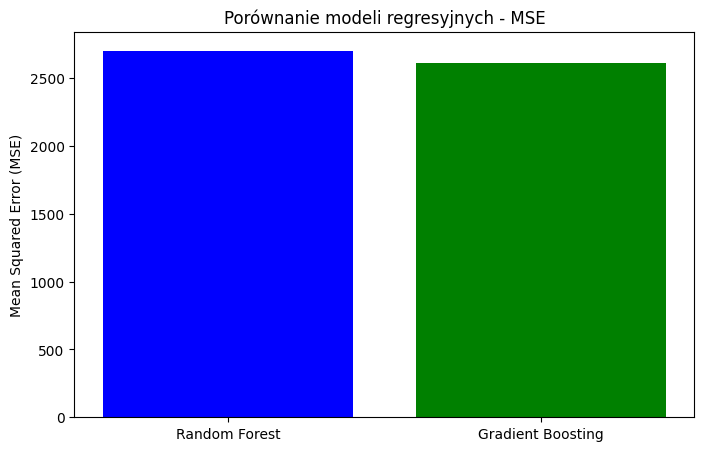

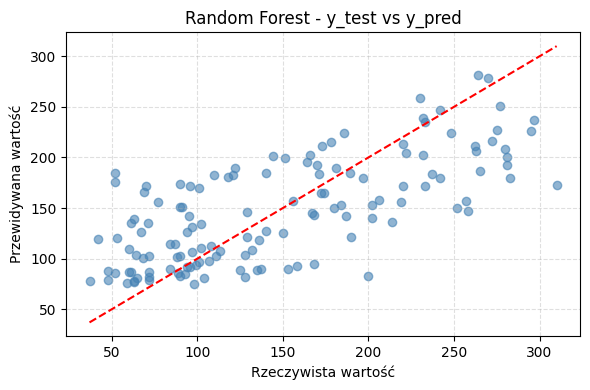

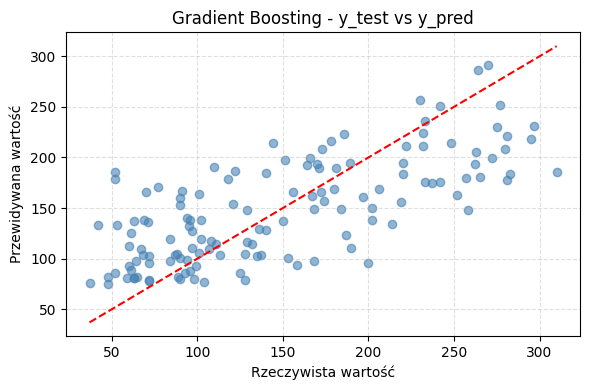

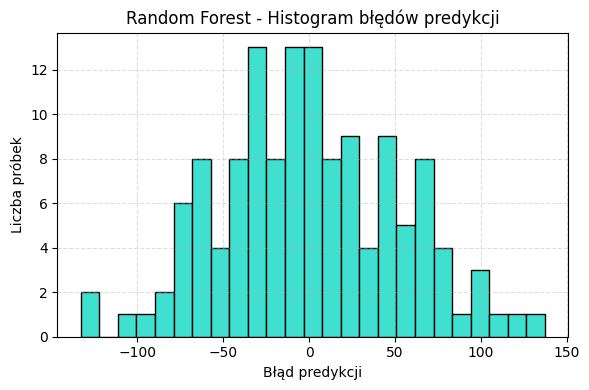

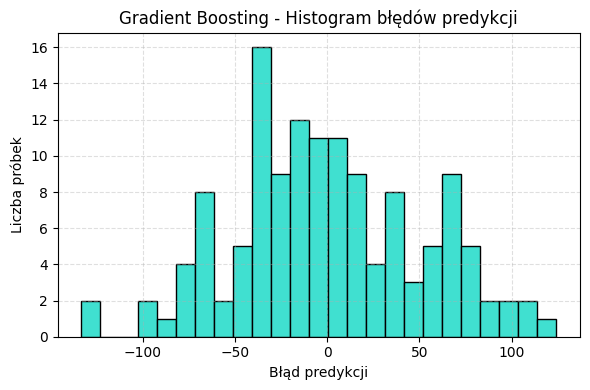

In [ ]:
models = {
  "Random Forest": best_rf_random_search,
  "Gradient Boosting": best_gb_random_search,
}

results = {}

# Trening i ocena każdego modelu
for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_train, y_train, X_test, y_test)

    print(f"\n{name}")
    print(f"Train: MSE={results[name]['MSE_train']:.2f}, RMSE={results[name]['RMSE_train']:.2f}, MAE={results[name]['MAE_train']:.2f}, R²={results[name]['R2_train']:.2f}")
    print(f"Test:  MSE={results[name]['MSE_test']:.2f}, RMSE={results[name]['RMSE_test']:.2f}, MAE={results[name]['MAE_test']:.2f}, R²={results[name]['R2_test']:.2f}")

# Rysowanie wykresów
plot_results(results, y_test, models)